# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import mlxtend.preprocessing as mx
%matplotlib inline

In [2]:
# Read in the data set
df = pd.read_csv('ames.csv')
df.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


In [3]:
# Clean and pre-process the data if neccessary
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
print(f'Total missing data percentage : {(total_missing/total_cells) * 100} %')
df=df.drop('Year_Built',axis=1)
df = df[['Sale_Price','Garage_Area', 'Gr_Liv_Area']]
og_sales = df['Sale_Price'].values


Total missing data percentage : 0.0 %


c:\Users\AMMAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AMMAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AMMAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AMMAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

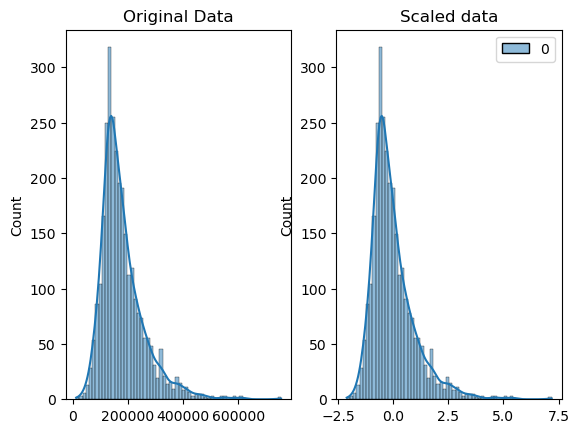

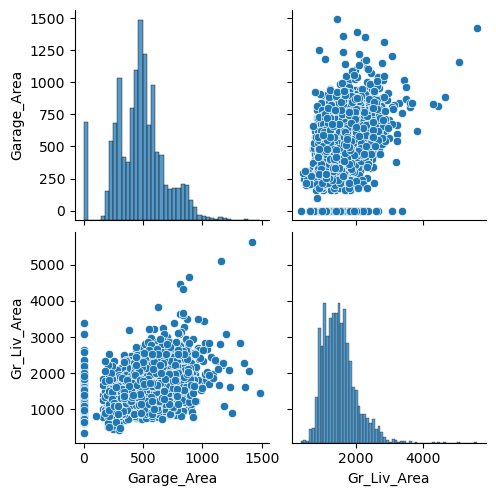

In [30]:
# Explore the data with visualisations such as histograms and correlation matrices

scaled_data = mx.standardize(og_sales, columns= [0])

# Distribution of variables
fig, ax=plt.subplots(1,2)
sns.histplot(og_sales, ax=ax[0],kde=True)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1],kde=True)
ax[1].set_title("Scaled data")


# Relationships between variables
sns.pairplot(df.drop('Sale_Price', axis=1))
plt.show()


In [5]:
# Split the independent variables from the dependent variable
X = df.drop('Sale_Price', axis=1).values.reshape(-1,2)
Y = df['Sale_Price'].values.reshape(-1,1)


<Axes: >

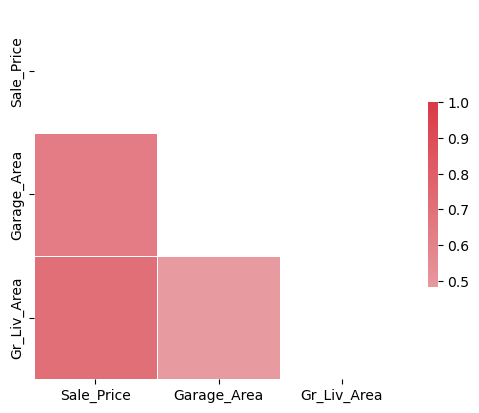

In [20]:
# Explore relationships between the independent and dependent variables
# Reference [1]
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots()
cmap = sns.diverging_palette(120, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
# Create a training and test set with a 75:25 split ratio
rseed = 1000 # Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25,  random_state=rseed)
sc = MinMaxScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (2197, 2) (2197, 1)
Test data: (733, 2) (733, 1)


In [8]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
sales_model = LinearRegression()
sales_model.fit(X,Y)

LinearRegression()

In [9]:
# Print the model intercept and coefficients
print('Intercept: \n', sales_model.intercept_)
print('Coefficients: \n', sales_model.coef_)

Intercept: 
 [-10365.25158597]
Coefficients: 
 [[144.50658946  81.92294905]]


In [35]:
# Generate predictions for the test set
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lm.predict(X_line)
predictions[:5]

array([[ 97765.54971804],
       [187912.64215769],
       [185240.06405261],
       [189897.57036776],
       [185448.26038021]])

In [11]:
# Evaluate the model
print ("R2 Score:", round (r2_score(y_test, predictions), 4))

R2 Score: 0.6018


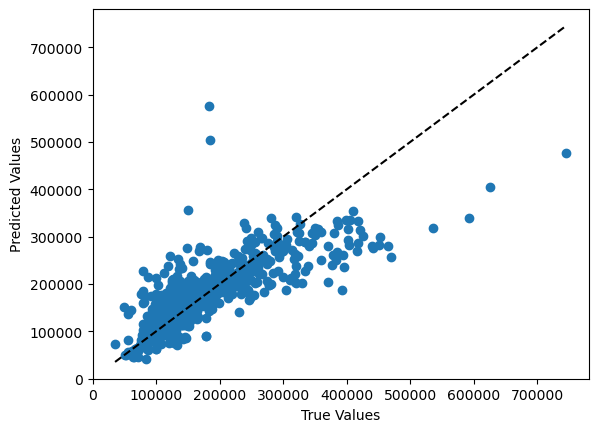

In [34]:
# Generate a plot
# Plotting predected/True value
plt.scatter(y_test,predictions)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], linestyle = '--', color = 'BLACK')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [13]:
# Print the coefficients
cof = lm.coef_
print("Coefficients:")
print("Gr_Liv_Area:", round(cof[0][1],0))
print("Garage_Area:", round(cof[0][0],0))

Coefficients:
Gr_Liv_Area: 445902.0
Garage_Area: 205090.0


**Interpret coefficients in the context of the prediction:**
The coefficients shows that the size of ground living area has bigger whight in predidicting the price while garage size has relatively fewer influence. 

**Summarise findings**
This model achieves a prediction accuracy of 60%, which is respectable for a linear regression model, particularly given that the data clusters within a small proximity. Nonetheless, to enhance accuracy, exploring alternative models might be beneficial. In terms of data, there is clear evidence indicating that the size of the ground living area (Gr_Liv_Area) exerts the most significant influence on property prices.

**References:**
[1] https://seaborn.pydata.org/examples/many_pairwise_correlations.html